In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

NodeView((1, 2, 3, 4, 5, 6, 7))

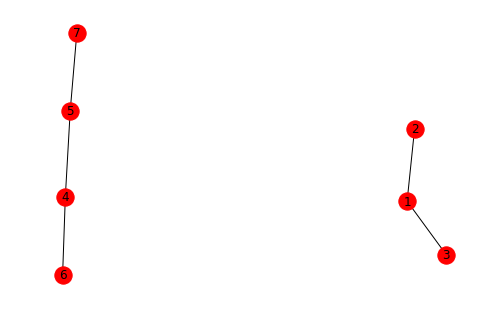

In [2]:
g = nx.empty_graph()
g.add_edges_from([(1,2), (1,3), (4,5), (4,6), (5,7)])
nx.draw(g, with_labels=True)

g.node

In [3]:
len(g.nodes())

7

In [4]:
def get_giant_size(net):
    """
    Calculates the size of the largest component (i.e. the giant component) of
    the network.

    Parameters
    ----------
    net: networkx.Graph() object

    Returns
    -------
    giant_size: int
        size of the giant component

    """
    max_size = -1
    largest_comp = {}
    components = nx.connected_components(net)
    for comp in components:
        size = len(comp)
        if size > max_size:
            max_size = size
            largest_comp = comp
    return largest_comp

In [5]:
get_giant_size(g)

{4, 5, 6, 7}

In [6]:
def simulate_edge_removal(orignet, order):
    """
    Performs an edge removal simulation

    Parameters
    ----------
    orignet: networkx.Graph() object
        Network in which the edge removal is simulated. A copy of orignet is
        created for the simulations, and the original network is not changed.
    order: list of tuples
        network edges sorted in the order in which they will be removed

    Returns
    -------
    giant_sizes: np.array of ints
        sizes of the giant component at different edge densities
    """
    giant_sizes = []
    net = orignet.copy() # Creating a copy of the original network
    
    next_print_frac = 0.1
    for idx, edge in enumerate(order):
        net.remove_edge(*edge)
        giant_sizes.append(get_giant_size(net))
        
        if idx/len(order) > next_print_frac:
            print("  {}% completed".format( round(next_print_frac * 100) ))
            next_print_frac += 0.1
    return giant_sizes

In [7]:
path = './OClinks_w_undir.edg' # You may want to change the path to the edge list file
net_name = 'fb-like-network'
"""
Sets up framework and runs the edge removal simulation.

Parameters
----------
path: string
    path to the network to be analyzed
net_name: string
    name of the network (for labeling)

Returns
-------
No direct output, saves figure of the giant component size as a function
of network density.
"""
net = nx.read_weighted_edgelist(path)
N = len(net.nodes()) # Replace with the number of nodes
edges = list(net.edges()) # Replace with the network edges

ascending_weight_edge_order = sorted(
    edges,
    key=lambda edge: net.get_edge_data(*edge)['weight']
) 
descending_weight_edge_order = ascending_weight_edge_order[::-1]

random_edge_order = edges.copy()
random.shuffle(random_edge_order)

In [8]:
between = nx.edge_betweenness_centrality(net)
# sorting the edges by their betweenness:
ebc_edge_order = sorted(edges, 
                        key=lambda edge: between[edge], 
                        reverse=True)

W_BIG_FIRST
  10% completed
  20% completed
  30% completed
  40% completed
  50% completed
  60% completed
  70% completed
  80% completed
  90% completed


TypeError: unsupported operand type(s) for /: 'set' and 'float'

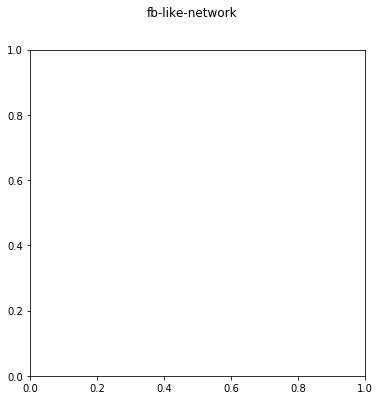

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
fig.suptitle(net_name)

# edge removal:
for order, order_name, color, ls, lw in zip(
    [descending_weight_edge_order, ascending_weight_edge_order,
     random_edge_order, ebc_edge_order],
    ["w_big_first",
     "w_small_first", 'random', "betweenness"],
    ["r", "y", "b", "k"],
    ["-", "-", "-", "-"],
    [2, 3, 4, 5]
):
    print(order_name.upper())

    giant_sizes = simulate_edge_removal(net, order)
    fracs = np.linspace(0, 1, len(giant_sizes))

    ax.plot(fracs, np.array(giant_sizes) / float(N), "-", color=color, ls=ls,
            label="g " + order_name, lw=lw)

    ax.set_ylabel('Largest Component Size (relative to network size)') 
    ax.set_xlabel('Fraction of Removed Links')

    ax.legend(loc=2)

In [ ]:
simulate_edge_removal(net, order)